In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
crash_df = sns.load_dataset('car_crashes')

crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [9]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


## Distribution Plots

### dist plot

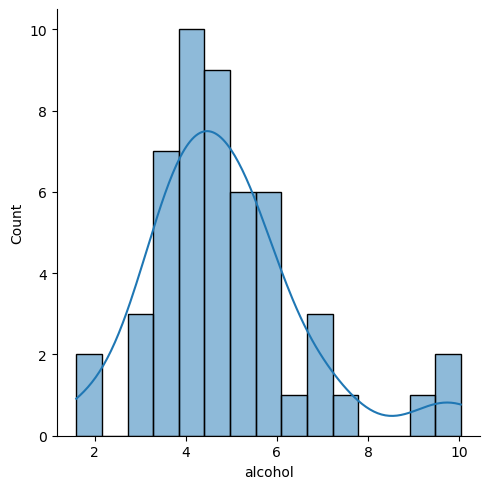

In [15]:
sns.displot(crash_df['alcohol'], kde= True, bins=15)

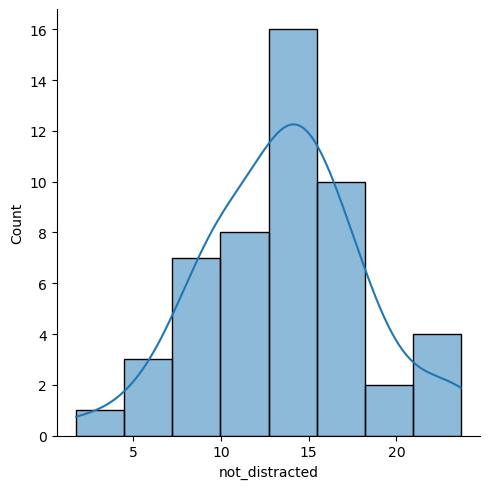

In [19]:
sns.displot(crash_df['not_distracted'], kde= True)

### joint plot

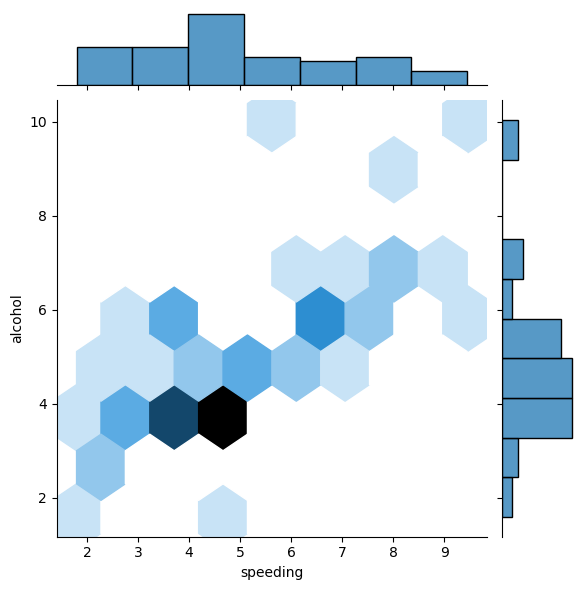

In [23]:
sns.jointplot(x= 'speeding', y= 'alcohol', data= crash_df, kind= 'hex')

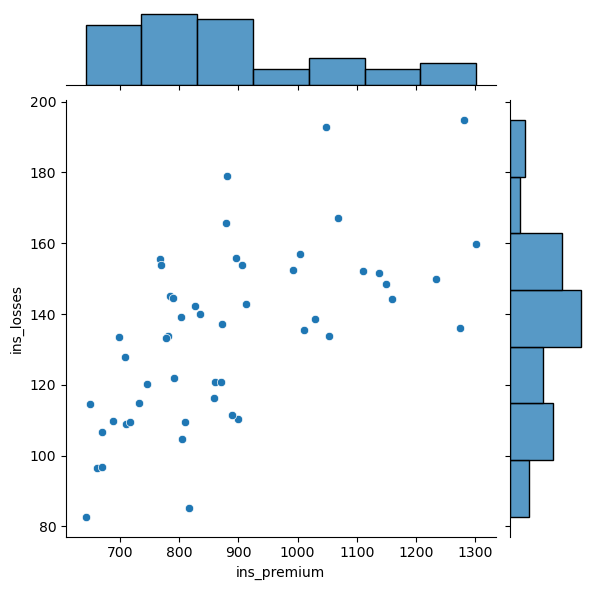

In [25]:
sns.jointplot(x= 'ins_premium', y= 'ins_losses', data= crash_df, kind= 'scatter')

### kde plot

<AxesSubplot:xlabel='total', ylabel='Density'>

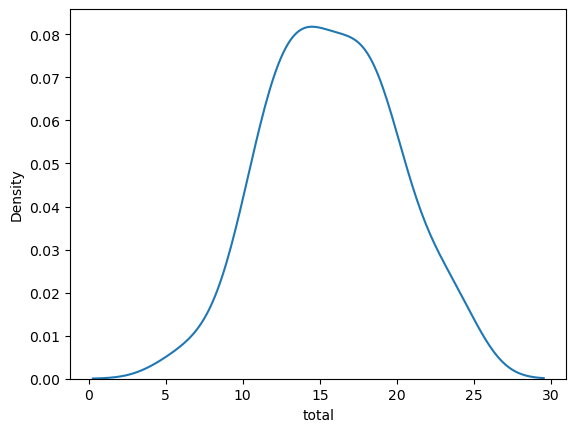

In [26]:
sns.kdeplot(crash_df['total'])

### pair plots

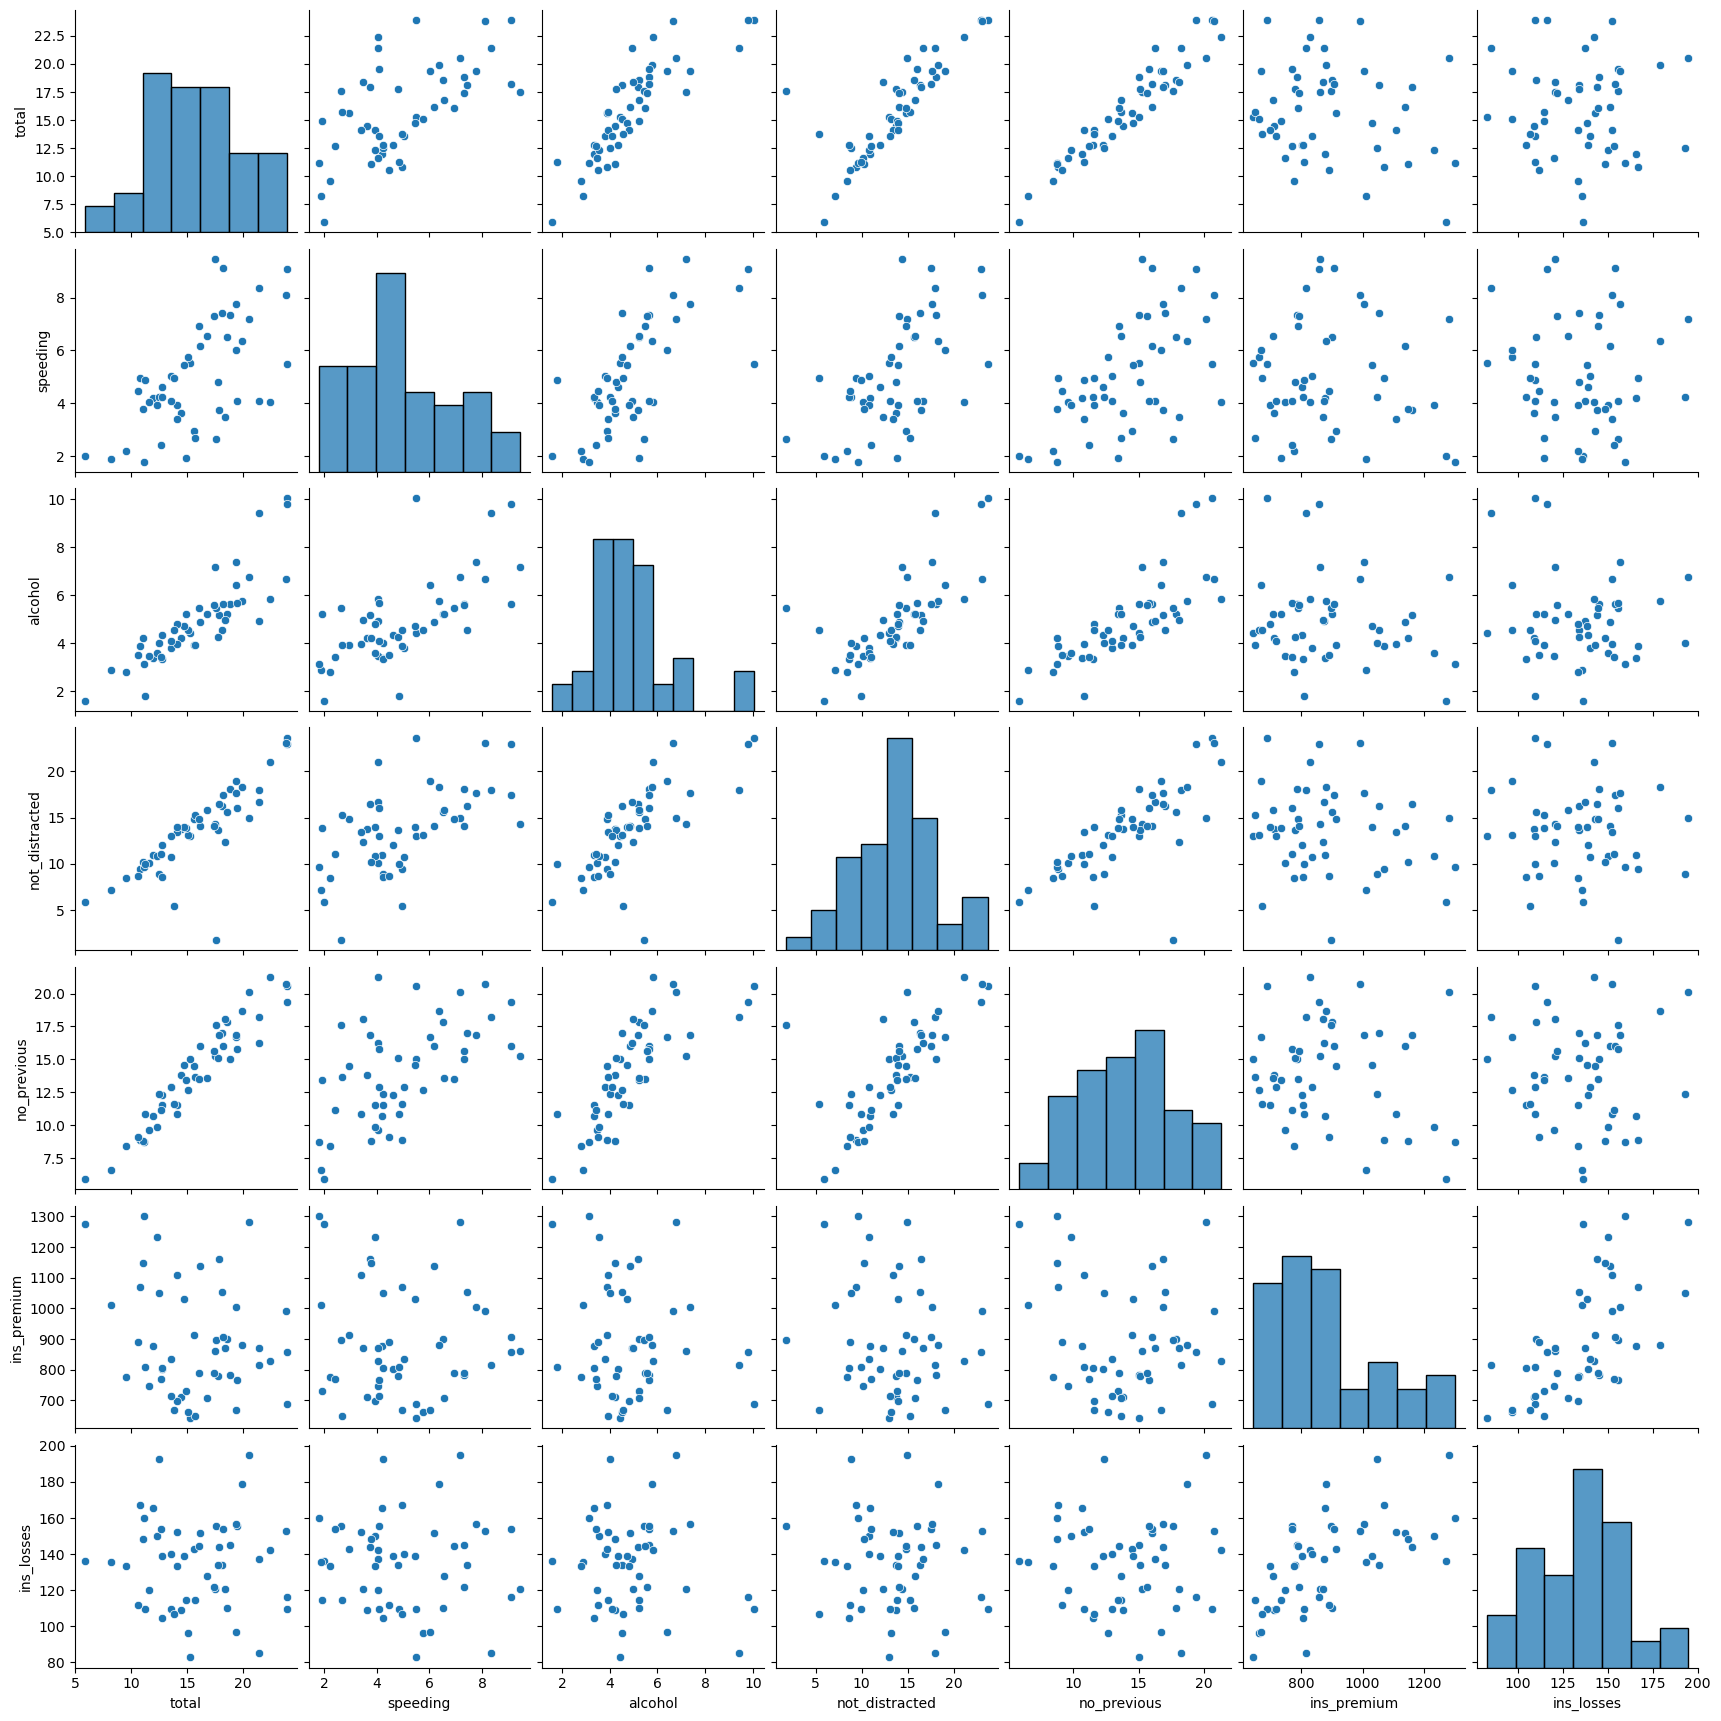

In [27]:
sns.pairplot(crash_df)

In [28]:
tips_df = sns.load_dataset('tips')

tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


tips_df.day.value_counts(sort=False)

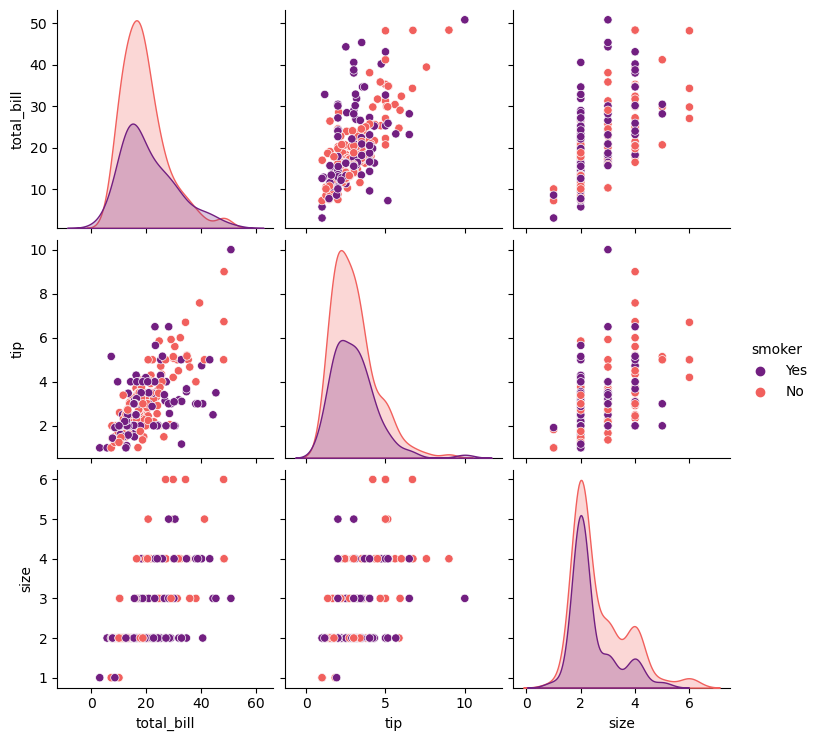

In [40]:
sns.pairplot(tips_df, hue= 'smoker', palette= 'magma')


### Styling 

<Figure size 800x500 with 0 Axes>

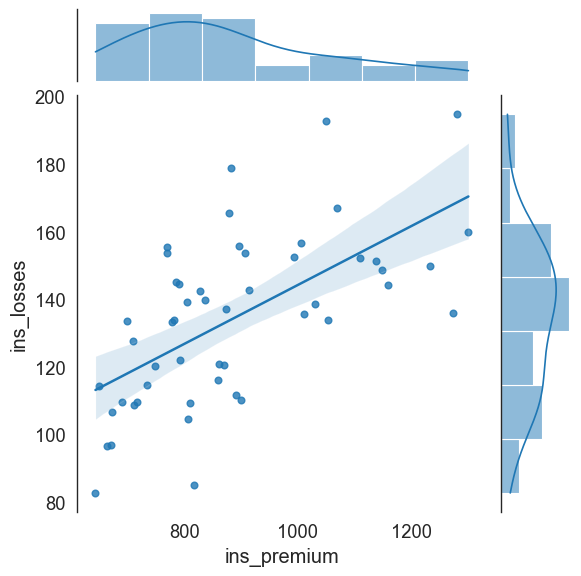

In [69]:
sns.set_style('white')
plt.figure(figsize= (8,5))
sns.set_context('paper', font_scale= 1.5)


sns.jointplot(x= 'ins_premium', y= 'ins_losses', data= crash_df, kind= 'reg')

sns.despine(left=False, bottom=True)

## Categorical plots

### Bar plot

<AxesSubplot:xlabel='smoker', ylabel='tip'>

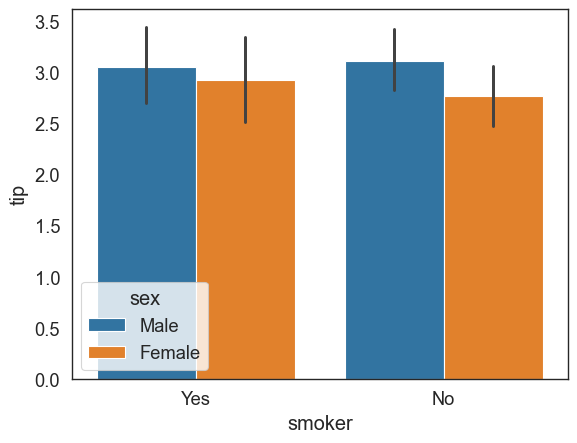

In [87]:
sns.barplot(x= 'smoker', y= 'tip', data=tips_df, estimator=np.mean, hue='sex')

<AxesSubplot:xlabel='sex', ylabel='tip'>

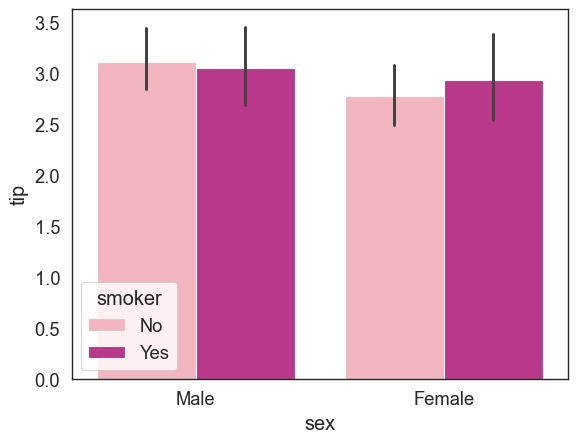

In [91]:
sns.barplot(x= 'sex', y= 'tip', data=tips_df, 
            estimator=np.mean, hue='smoker', 
            hue_order= ['No', 'Yes'],
           palette = 'RdPu')

### count plot

Text(0, 0.5, 'No. of Males and Females')

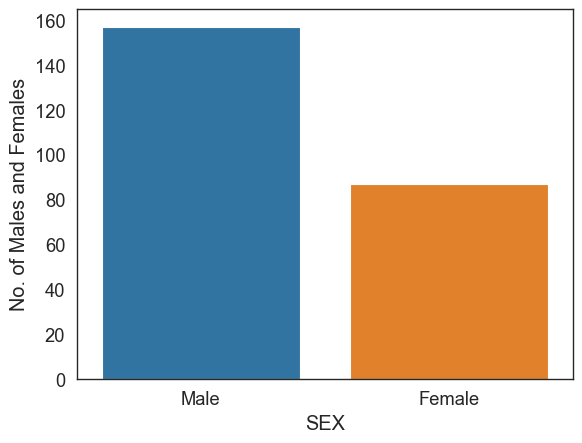

In [96]:
sns.countplot(x='sex', data=tips_df)
plt.xlabel('SEX')
plt.ylabel('No. of Males and Females')

### Box Plot

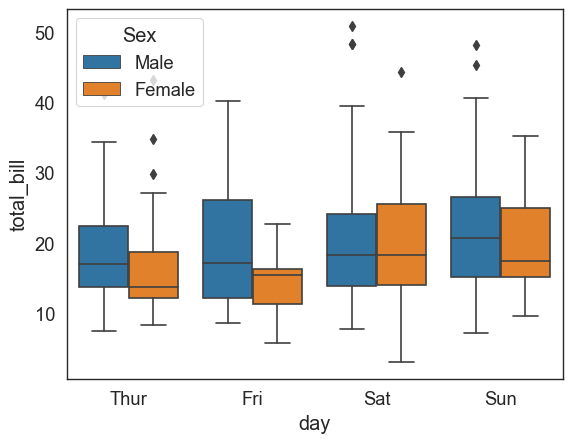

In [109]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc='best', title='Sex')

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='tip'>

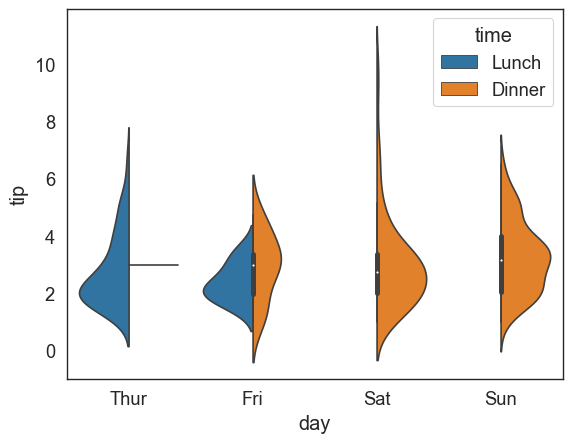

In [112]:
sns.violinplot(x='day', y='tip', data=tips_df, hue='time', split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='tip'>

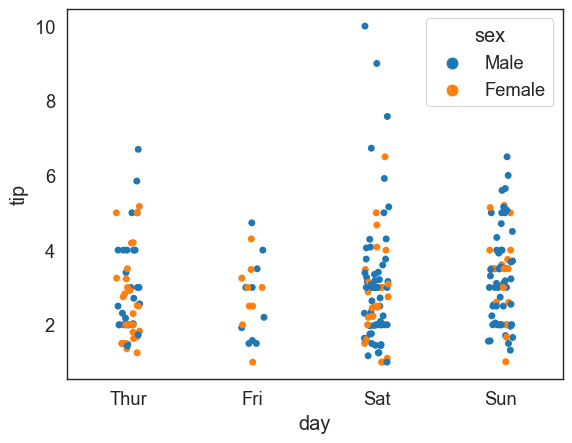

In [113]:
sns.stripplot(x='day', y='tip', data=tips_df, hue='sex')

In [114]:
tips_df.query('day == "Sat" and tip >= 6 ')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='tip'>

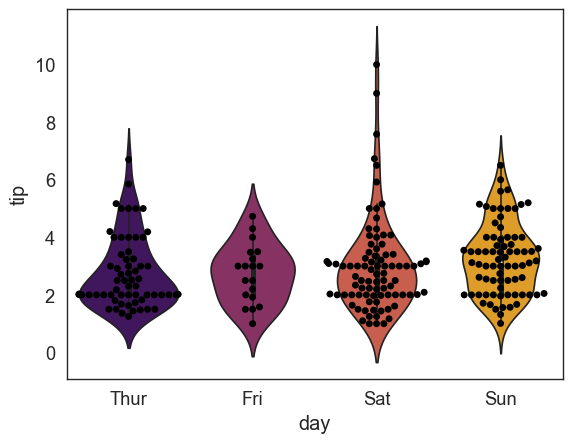

In [122]:
sns.violinplot(x='day', y='tip', data=tips_df, palette='inferno')
sns.swarmplot(x='day', y='tip', data=tips_df, color='black')

## Matrix Plots

### Heatmaps

<AxesSubplot:>

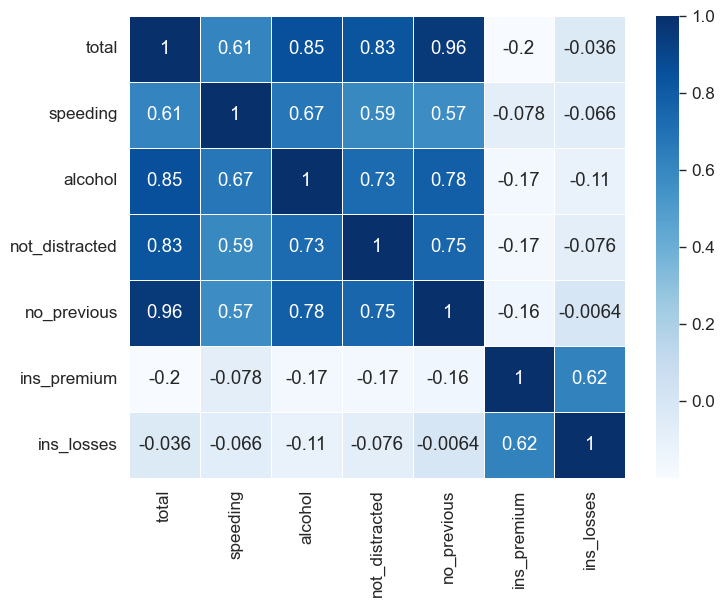

In [129]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(crash_df.corr(), annot=True, cmap='Blues', linecolor='white', linewidth=0.5)

### PairGrid

In [132]:
peng_df= sns.load_dataset('penguins')
peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


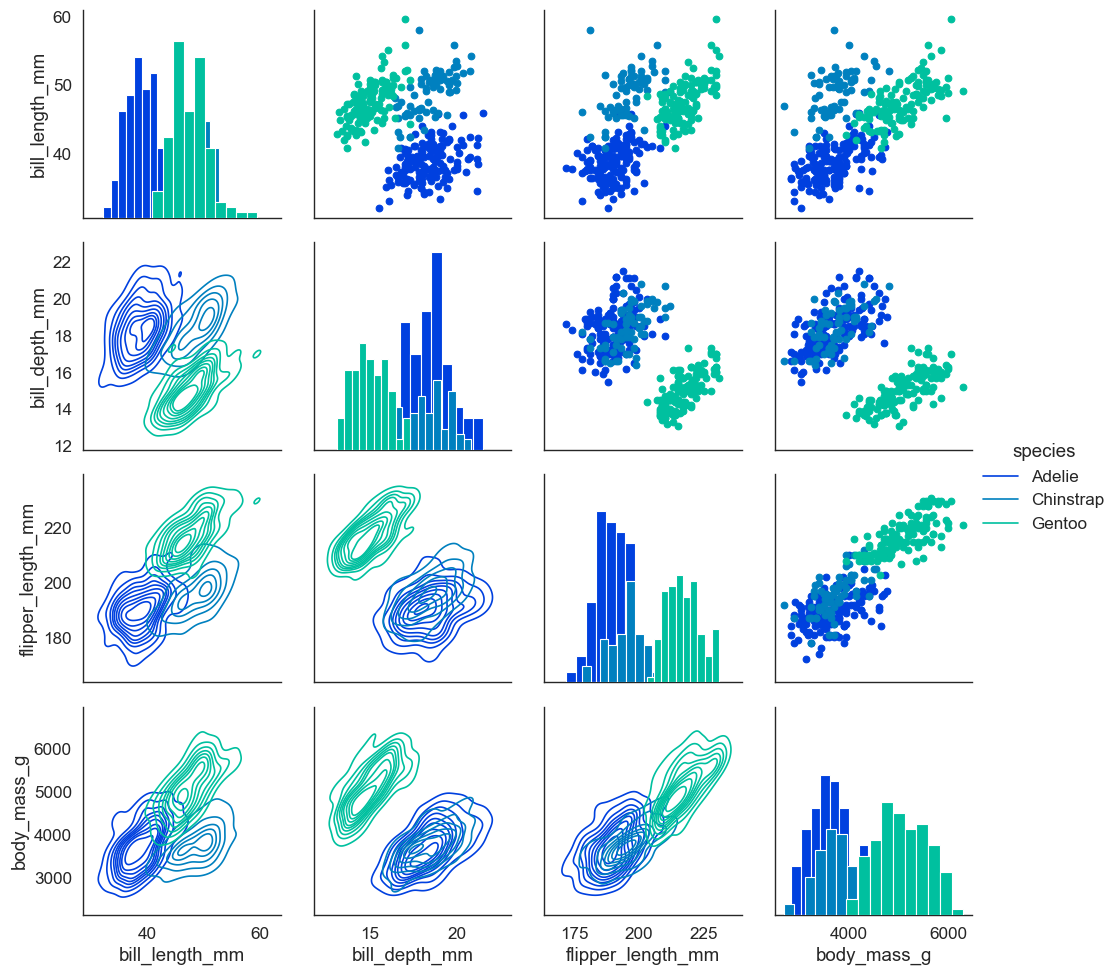

In [143]:
peng_g = sns.PairGrid(peng_df, hue='species', palette='winter')
peng_g.map_diag(plt.hist)
peng_g.map_upper(plt.scatter)
peng_g.map_lower(sns.kdeplot)
peng_g.add_legend()

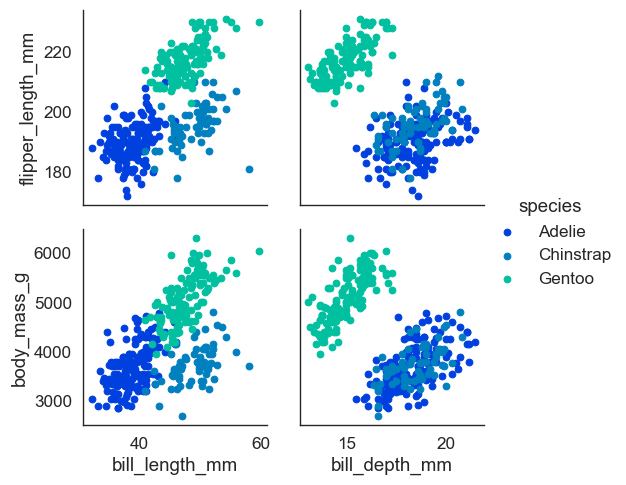

In [145]:
peng_g = sns.PairGrid(peng_df, hue='species', palette='winter',
                     x_vars = ['bill_length_mm', 'bill_depth_mm'],
                     y_vars = ['flipper_length_mm', 'body_mass_g'])
peng_g.map(plt.scatter)

peng_g.add_legend()

### Task

Load the mpg dataset. Do EDA and derive five actionable insights from the dataset.